# 머스크 트윗이 도지코인 가격에 미치는 영향
* 프로젝트의 background를 위한 분석
* **2021년 2월 4일 08시 35분** 업로드된 트윗을 event로 삼음 (Ante의 event 9)

# Load price data

In [2]:
from data.price import get_price_data
from datetime import datetime

df = get_price_data(
    start_time=datetime(2021, 2, 3),
    end_time=datetime(2021, 2, 5),
    interval="1m",
    include_volume=True,
    file_path="price.csv",  # save as file
    verbose=True,
)

# # Or, if you already have downloaded the data
# import pandas as pd

# df = pd.read_csv("price.csv")

In [3]:
print(len(df))
df.sample(n=5)

2881


,date,DOGEUSDT,DOGEUSDT_volume
146,2021-02-03T02:26:00,0.031109,3792209.0
10,2021-02-03T00:10:00,0.031651,5900961.0
23,2021-02-03T00:23:00,0.031300,16806146.0
21,2021-02-03T00:21:00,0.031395,4838802.0
199,2021-02-03T03:19:00,0.030880,4532687.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2881 non-null   object 
 1   DOGEUSDT         2881 non-null   float64
 2   DOGEUSDT_volume  2881 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.6+ KB


# Event study
* [constant mean model](https://lemairejean-baptiste.github.io/eventstudy/api/eventstudy.Single.constant_mean.html#eventstudy.Single.constant_mean) 사용
* [example code](https://github.com/LemaireJean-Baptiste/eventstudy/blob/master/example/Untitled.ipynb)

In [5]:
from eventstudy import Single
import numpy as np

Single.import_returns(
    "price.csv",
    is_price=True,
    log_return=True,
    date_format="%Y-%m-%dT%H:%M:%S",
)

In [6]:
event = Single.constant_mean(
    security_ticker = 'DOGEUSDT',
    event_date = np.datetime64('2021-02-04 08:35:00'),
    event_window = (0, +10),
    estimation_size=360,
)

In [7]:
from eventstudy import excelExporter
# not used directly, but must be imported

event.to_excel("result_0_10.xlsx")

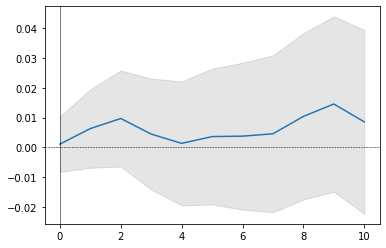

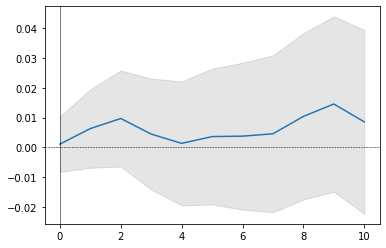

In [8]:
event.plot()